In [3]:
import pandas as pd
import numpy as np

Hoy se va a trabajar con PANDAS

Series

Es una matriz unidimensional capaz de contener cualquier tipo de datos, en teroria, cada columna deberia tener un tipo de dato en especifico.                  
Las etiquetas de los ejes se conocen como el INDICE.                                                                                                        
Cuando tiene mas de un indice de columna se conoce como DATAFRAME




In [ ]:
serie = pd.Series('data', index='index')

La data puede ser un diccionario de python, un ndarray o un valor escalar.                                                                                     
El indice pasado es una lista de etiquetas de eje.

In [ ]:
s = pd.Series([1,2,5])
print(s)

Si data es un ndarray, el indice debe tener la misma longitud que los datos.                                                                                  
Si no se pasa ningun indice, se creara uno con valores. [0,...,len(data)-1]

In [37]:
s = pd.Series(np.random.randn(5), index = ['a','b','c','d','e'])
print(s)
s.index

a   -0.786845
b    0.804678
c   -0.890730
d   -0.427515
e   -0.161738
dtype: float64


Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

Si data es un diccionario:

In [30]:
d = {'b':1, 'a':0,'c':2}
s1 = pd.Series(d)
print(s1)

b    1
a    0
c    2
dtype: int64


In [33]:
s1[0]

C:\Users\DRA01\AppData\Local\Temp\ipykernel_7108\643609873.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s1[0]


1

In [39]:
s[:3]
s[3:]
s[-1]

C:\Users\DRA01\AppData\Local\Temp\ipykernel_7108\120827750.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[-1]


-0.16173813136846044

Con un escalar simplemente le va a poner ese escalar a tantos index hayan

Operaciones con las series

In [42]:
#Mediana de la serie

s.median()

#Visualizar segun las posiciones

s[[4,3,1]]

#filtrar

s[s > s.median()]

C:\Users\DRA01\AppData\Local\Temp\ipykernel_7108\4155701467.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[[4,3,1]]


b    0.804678
e   -0.161738
dtype: float64

Para ver de otra manera las Series se pueden usar los siguientes metodos:

In [43]:
s.array

<NumpyExtensionArray>
[  -0.786844996155903,   0.8046783334252464,  -0.8907304412342179,
 -0.42751464917667403, -0.16173813136846044]
Length: 5, dtype: float64

In [44]:
s.to_xarray

<bound method NDFrame.to_xarray of a   -0.786845
b    0.804678
c   -0.890730
d   -0.427515
e   -0.161738
dtype: float64>

Operaciones

In [ ]:
# Suma

s[1:] + s[:-1]

# Multiplicacion 
s*2

#Division

s / 2

#Exponencial

np.exp(s)

#Para borrar los NaN

withnan = s[1:] + s[:-1]
withoutnan = withnan.dropna()
print(withoutnan)

Para practicar 

In [59]:
import os
import glob

ubi = os.getcwd()
file = glob.glob(ubi + '/*.csv')
mmse = pd.read_csv(file[0],sep = ';')
print(mmse)

       Group Sexo  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0    Control    F   87    14    2    27  0.0  1987  0.696  0.883
1    Control    F   88    14    2    30  0.0  2004  0.681  0.876
2        DCL    F   75    12    3    23  0.5  1678  0.736  1.046
3        DCL    F   76    12    2    28  0.5  1738  0.713  1.010
4        DCL    F   80    12    3    22  0.5  1698  0.701  1.034
..       ...  ...  ...   ...  ...   ...  ...   ...    ...    ...
368      DCL    F   82    16    1    28  0.5  1693  0.694  1.037
369      DCL    F   86    16    1    26  0.5  1688  0.675  1.040
370  Control    M   61    13    2    30  0.0  1319  0.801  1.331
371  Control    M   63    13    2    30  0.0  1327  0.796  1.323
372  Control    M   65    13    2    30  0.0  1333  0.801  1.317

[373 rows x 10 columns]


In [78]:
alzheimer = pd.read_csv(file[0],sep = ';')
# print(alzheimer)
alzheimer.size
alzheimer.shape
alzheimer.columns
alzheimer['Sexo'].describe() #Me da un monton de datos estadisticos de esa fila
alzheimer.describe().T #Me da un monton de datos estadisticos de esa fila, T es la transpuesta
alzheimer.iloc[1] #Entro a la locacion de un objeto usando el indice como parametro
alzheimer_copy = alzheimer.copy() #Se crea una copia para no editar el archivo original 
alzheimer_copy.reset_index() #Lit reseteo los indices
alzheimer_copy = alzheimer_copy.drop(['Age'],axis = 1) #Esto me elimina una columan y el axis es si es vertical(1) u horizontal(0) 
del alzheimer_copy['Age'] #Otra forma de eliminar 
alzheimer_copy = alzheimer_copy.assign('falseIndex') 

,index,Group,Sexo,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,Control,F,87,14,2,27,0.0,1987,0.696,0.883
1,1,Control,F,88,14,2,30,0.0,2004,0.681,0.876
2,2,DCL,F,75,12,3,23,0.5,1678,0.736,1.046
3,3,DCL,F,76,12,2,28,0.5,1738,0.713,1.010
4,4,DCL,F,80,12,3,22,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
368,368,DCL,F,82,16,1,28,0.5,1693,0.694,1.037
369,369,DCL,F,86,16,1,26,0.5,1688,0.675,1.040
370,370,Control,M,61,13,2,30,0.0,1319,0.801,1.331
371,371,Control,M,63,13,2,30,0.0,1327,0.796,1.323


In [83]:
alzheimer.loc[1] #Entro a la locacion de un objeto usando el indice como parametro

Group    Control
Sexo           F
Age           88
Educ          14
SES            2
MMSE          30
CDR          0.0
eTIV        2004
nWBV       0.681
ASF        0.876
Name: 1, dtype: object

In [90]:
alzheimer_edad_70 = alzheimer[(alzheimer['Age'] >= 90)]
print(alzheimer_edad_70)
print(alzheimer_copy)

       Group Sexo  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
6    Control    M   90    18    3    27  0.0  1600  0.718  1.462
13   Control    M   93    14    2    30  0.0  1272  0.698  1.380
14   Control    M   95    14    2    29  0.0  1257  0.703  1.396
28       DCL    F   90     8    4    23  0.5  1668  0.646  1.052
35       DTA    M   92    14    1    27  0.5  1423  0.696  1.234
59       DTA    M   91    12    3    28  0.5  1463  0.696  1.199
60       DCL    F   90    12    3    21  0.5  1307  0.679  1.342
61       DCL    F   92    12    3    24  0.5  1311  0.676  1.339
107  Control    M   92    23    1    29  0.0  1454  0.701  1.207
108  Control    M   94    23    1    29  0.0  1474  0.696  1.190
109  Control    M   97    23    1    30  0.0  1483  0.689  1.184
146  Control    M   90    12    3    29  0.0  1475  0.676  1.190
169  Control    F   91    16    1    28  0.0  1640  0.670  1.070
170  Control    F   92    16    1    30  0.0  1662  0.682  1.056
183      DCL    M   96   

In [93]:
alzheimer_educ_14 = alzheimer[(alzheimer['Educ'] < 14)]
print(alzheimer_educ_14.shape)
alzheimer['Educ'].max()
alzheimer['Educ'].mean()
alzheimer.min()


(153, 10)


In [96]:
import seaborn as sns

Text(0.5, 1.0, 'Grafico de barras')

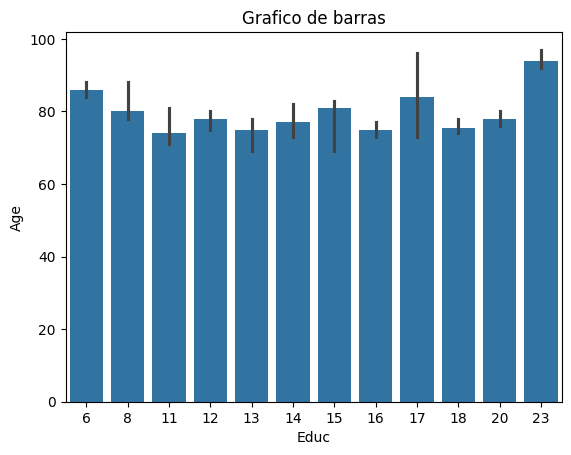

In [99]:
import matplotlib.pyplot as plt
sns.barplot(x='Educ',y='Age', data = alzheimer, estimator=np.median)
plt.title('Grafico de barras')

<Axes: xlabel='Age', ylabel='Count'>

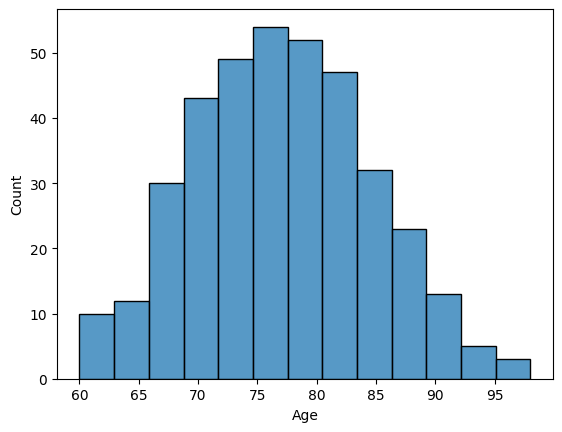

In [101]:
sns.histplot(alzheimer['Age'])


<Axes: xlabel='Age', ylabel='Density'>

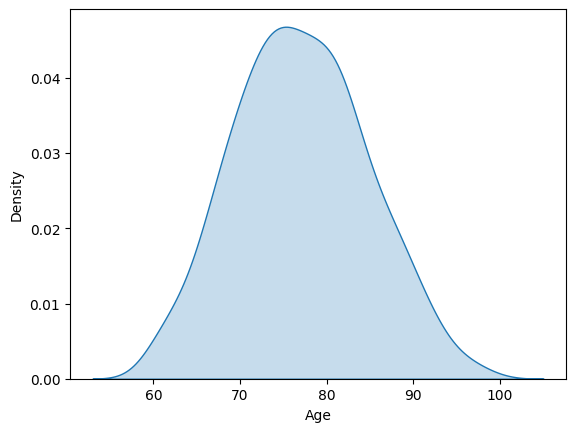

In [104]:
sns.kdeplot(data = alzheimer['Age'], fill=True)

C:\Users\DRA01\AppData\Local\Temp\ipykernel_7108\3091710545.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=alzheimer, x='Group',y='Age',palette="rocket")


Text(0.5, 1.0, 'Diagrama de caja y bigote')

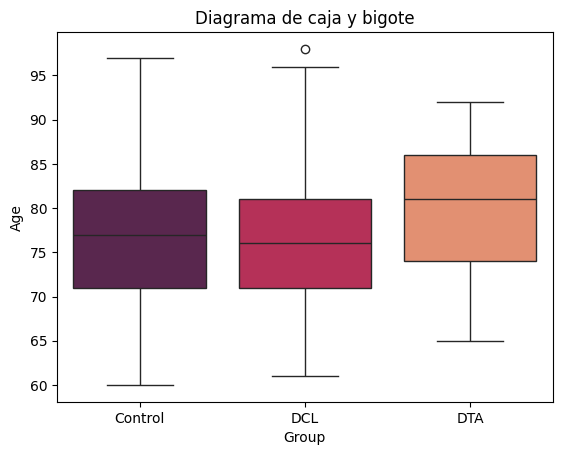

In [106]:
sns.boxplot(data=alzheimer, x='Group',y='Age',palette="rocket")
plt.title("Diagrama de caja y bigote")